In [1]:
# example of loading the cifar10 dataset
from matplotlib import pyplot
import tensorflow as tf


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/

In [2]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [25]:
import matplotlib.pyplot as plt
import numpy as np
import random

In [20]:
#meta_data=unpickle('/Users/mahfujurrahman/Desktop/Python/Dataset/batches.meta')


In [8]:
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 277s 2us/step


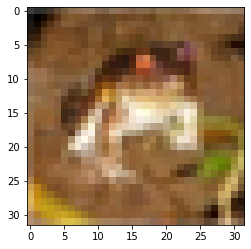

In [33]:
plt.imshow(x_train[0],cmap='binary')
plt.show()

In [23]:
x_train[0].shape

(32, 32, 3)

In [176]:
x=np.where(y_test==0)
np.count_nonzero(x[0])

510

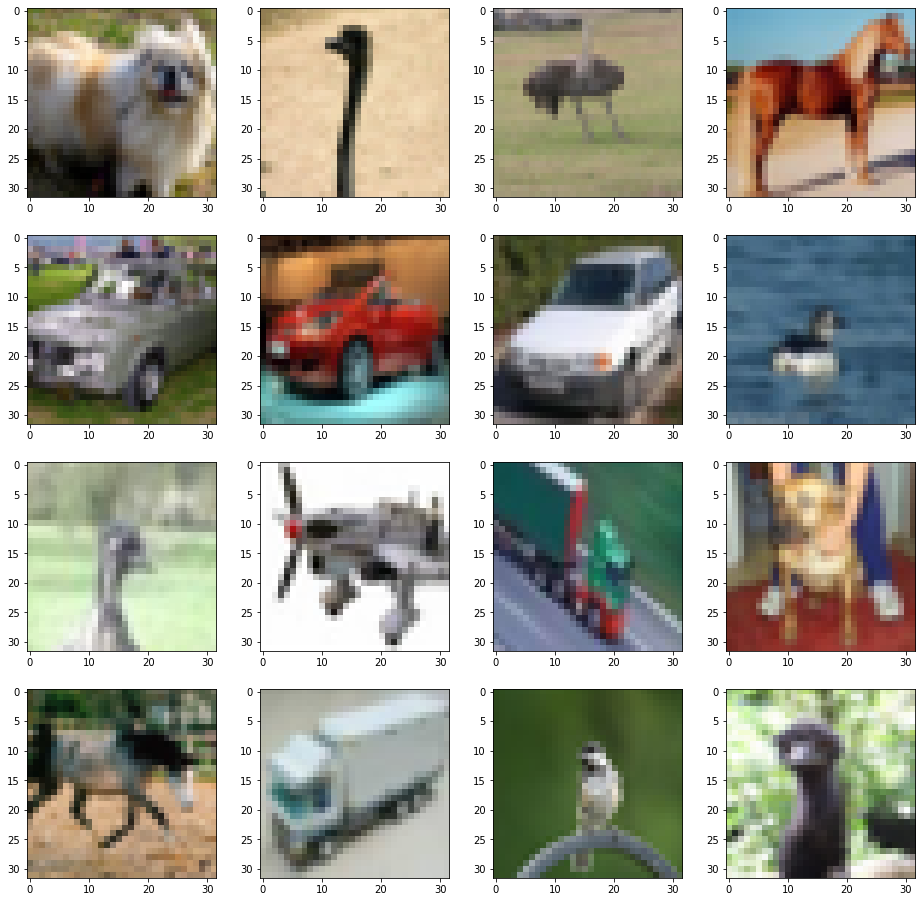

In [87]:
%matplotlib inline
j=0
fig=plt.gcf()
fig.set_size_inches(16,16)

for i in range(40,56):
    plt.subplot(4,4,j+1)
    plt.axis('On')
    # plt.figure()
    plt.imshow(x_train[i],cmap='binary')
    j=j+1
plt.show()

In [60]:
y_test.shape

(10000, 1)

In [77]:
%%time
total = 0
sum=total+3


CPU times: user 5 µs, sys: 1 µs, total: 6 µs
Wall time: 11 µs


In [80]:
%%time
total.__add__(3)

CPU times: user 5 µs, sys: 1 µs, total: 6 µs
Wall time: 10.7 µs


3

In [89]:
print(x_train[0].shape)
print(y_train[0].shape)

(32, 32, 3)
(1,)


In [95]:
classes=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [102]:
uni_val=np.unique(y_train)

In [114]:
print(x_train[0],y_train[0])

[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]] [6]


In [154]:
x=np.where(y_train==3)
np.count_nonzero(x[0])


4526

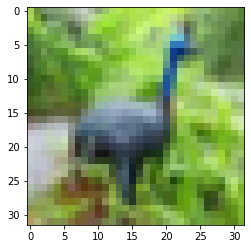

In [145]:
index=np.where(y_train==2)
val=index[0][0]
plt.imshow(x_train[val],cmap='binary')
plt.show()

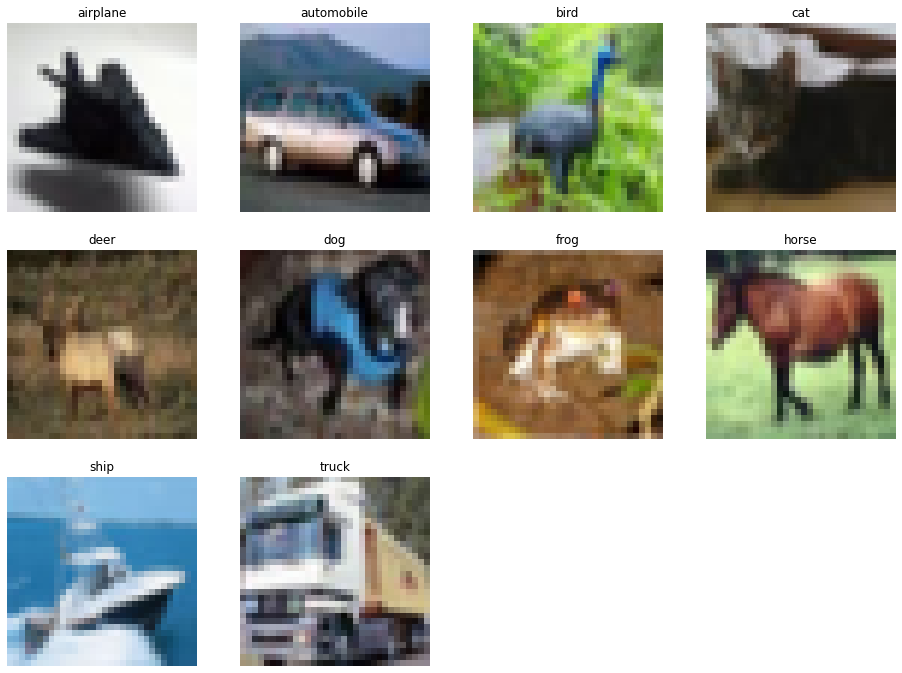

CPU times: user 360 ms, sys: 7.33 ms, total: 367 ms
Wall time: 364 ms


In [148]:
j=0
fig=plt.gcf()
fig.set_size_inches(16,16)
for i in uni_val:
    index=np.where(y_train==i)
    val=index[0][0]
    
    plt.subplot(4,4,j+1)
    plt.axis('Off')
    plt.imshow(x_train[val],cmap='binary')
    plt.title(classes[i])
    j=j+1
plt.show()

    
    

In [178]:
for i in uni_val:
    x=np.where(y_test==i)
    print(np.count_nonzero(x[0]))

510
492
515
474
530
498
500
489
481
510


In [151]:
from sklearn.model_selection import train_test_split

In [157]:
x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size=.1,random_state=1)

In [168]:
list_x_train=[]
list_x_val=[]
list_x_test=[]
for i in uni_val:
    x=np.where(y_train==i)
    list_x_train.append(np.count_nonzero(x[0]))
    x=np.where(y_val==i)
    list_x_val.append(np.count_nonzero(x[0]))
    x=np.where(y_test==i)
    list_x_test.append(np.count_nonzero(x[0]))
    
    

    

In [201]:
def autolabel(rects):
    for rect in rects:
        height=rect.get_height()
        ax.annotate('{}'.format(height),
                   xy=(rect.get_x()+rect.get_width()/2,height),
                    xytext=(0,3),
                    textcoords='offset points',
                    ha='center',va='')
                    
        

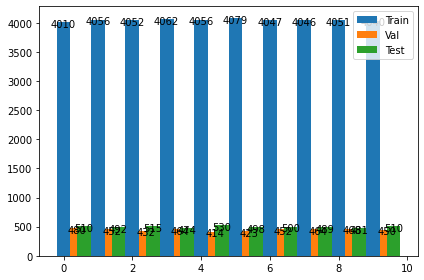

In [202]:
width=.40
x=np.arange(len(classes))
fig,ax=plt.subplots()
r1=ax.bar(x,list_x_train,width,label='Train')
r2=ax.bar(x+width,list_x_val,width,label='Val')
r3=ax.bar(x+width+width/2,list_x_test,width,label='Test')
ax.legend()
autolabel(r1)
autolabel(r2)
autolabel(r3)
fig.tight_layout()
plt.show()

[510, 492, 515, 474, 530, 498, 500, 489, 481, 510]